# Weather Check

In [298]:
#importing liraries
import copy
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [299]:
#Loading the data into df
df = pd.read_csv('weather-check.csv',low_memory=False)

In [300]:
#To get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
RespondentID                                                                                                                                    928 non-null int64
Do you typically check a daily weather report?                                                                                                  928 non-null object
How do you typically check the weather?                                                                                                         928 non-null object
A specific website or app (please provide the answer)                                                                                           928 non-null object
If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?    928 non-null object
Age                                                                          

In [301]:
#Returns tuple of shape (Rows, columns) of dataframe
df.shape

(928, 9)

In [302]:
#find the count of unique values in the index 
df['Do you typically check a daily weather report?'].value_counts()

Yes    746
No     182
Name: Do you typically check a daily weather report?, dtype: int64

In [303]:
# find the count of unique values in the index 
df['How do you typically check the weather?'].value_counts()

The default weather app on your phone                    213
Local TV News                                            189
A specific website or app (please provide the answer)    175
The Weather Channel                                      139
Internet search                                          130
Newspaper                                                 32
Radio weather                                             31
-                                                         11
Newsletter                                                 8
Name: How do you typically check the weather?, dtype: int64

In [304]:
# find the count of unique values in the index 
df['A specific website or app (please provide the answer)'].value_counts()

-                                                 753
Accuweather                                        10
weather.com                                         7
Weather.com                                         6
accuweather                                         5
The Weather Channel app                             5
weatherbug                                          4
Weatherbug                                          4
Weather Underground                                 4
weather bug                                         4
Weather Bug                                         3
intellicast                                         3
Weather Bug App                                     2
The Weather Channel                                 2
the weather channel app                             2
weather channel                                     2
weather underground                                 2
yahoo weather                                       2
the weather channel         

In [305]:
# find the count of unique values in the index 
df['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'].value_counts()

Very likely          362
Somewhat likely      274
Very unlikely        208
Somewhat unlikely     73
-                     11
Name: If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?, dtype: int64

In [306]:
# find the count of unique values in the index 
df['Age'].value_counts()

45 - 59    278
60+        258
30 - 44    204
18 - 29    176
-           12
Name: Age, dtype: int64

In [307]:
# find the count of unique values in the index 
df['What is your gender?'].value_counts()

Female    527
Male      389
-          12
Name: What is your gender?, dtype: int64

In [308]:
# find the count of unique values in the index 
df['How much total combined money did all members of your HOUSEHOLD earn last year?'].value_counts()

Prefer not to answer    169
$25,000 to $49,999      132
$50,000 to $74,999      111
$100,000 to $124,999    104
$75,000 to $99,999      104
$10,000 to $24,999       81
$200,000 and up          58
$125,000 to $149,999     49
$0 to $9,999             45
$150,000 to $174,999     39
$175,000 to $199,999     23
-                        13
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

In [309]:
# find the count of unique values in the index 
df['US_Region'].value_counts()

Pacific               185
South Atlantic        154
East North Central    141
Middle Atlantic       104
West South Central     94
Mountain               72
West North Central     54
New England            52
East South Central     41
-                      31
Name: US_Region, dtype: int64

In [310]:
df

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US_Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
5,3886937140,Yes,A specific website or app (please provide the ...,AccuWeather App,Somewhat likely,18 - 29,Male,"$100,000 to $124,999",West South Central
6,3886923931,Yes,The Weather Channel,-,Very unlikely,30 - 44,Male,"$25,000 to $49,999",West South Central
7,3886913587,Yes,-,-,-,-,-,-,-
8,3886889048,Yes,The Weather Channel,-,Very likely,30 - 44,Male,Prefer not to answer,Pacific
9,3886848806,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$150,000 to $174,999",West North Central


# Data Cleaning

In [311]:
# df.copy() method is used to copy a data into df1 and some changes are made in the new data i.e. df1 where data cleaning is performed by replacing '-' to '' in 'Age' column
# and copy df2 is created by replacing 'prefer not to answer' to '' from column 'How much total combined money did all members of your HOUSEHOLD earn last year?'
# unnecessary rows are also need to delete

df1 = df.copy(deep=True)
df1['Age'] = df1['Age'].replace('-','')
df1 = df1[df1['Age'] != '']
df2 = df1.copy(deep=True)
df2['How much total combined money did all members of your HOUSEHOLD earn last year?'] = df2['How much total combined money did all members of your HOUSEHOLD earn last year?'].replace('Prefer not to answer','')
df2 = df2[df2['How much total combined money did all members of your HOUSEHOLD earn last year?'] != '']
df2=df2.replace("-", "NaN")

In [312]:
df2

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US_Region
0,3887201482,Yes,The default weather app on your phone,NaN,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
2,3887152228,Yes,The default weather app on your phone,NaN,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
5,3886937140,Yes,A specific website or app (please provide the ...,AccuWeather App,Somewhat likely,18 - 29,Male,"$100,000 to $124,999",West South Central
6,3886923931,Yes,The Weather Channel,NaN,Very unlikely,30 - 44,Male,"$25,000 to $49,999",West South Central
9,3886848806,Yes,The default weather app on your phone,NaN,Very likely,30 - 44,Male,"$150,000 to $174,999",West North Central
10,3886782609,No,Internet search,NaN,Somewhat unlikely,18 - 29,Male,"$0 to $9,999",Pacific
11,3886416355,No,The default weather app on your phone,NaN,Somewhat likely,30 - 44,Male,"$100,000 to $124,999",East North Central
13,3886328736,Yes,Local TV News,NaN,Very likely,30 - 44,Male,"$0 to $9,999",Middle Atlantic
14,3886284495,No,The Weather Channel,NaN,Very unlikely,18 - 29,Male,"$10,000 to $24,999",Middle Atlantic


In [313]:
# resetting the index values 
df2 = df2.reset_index(drop=True)

In [315]:
#printing the df2 dataframe
df2

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US_Region
0,3887201482,Yes,The default weather app on your phone,NaN,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887152228,Yes,The default weather app on your phone,NaN,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
2,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
3,3886937140,Yes,A specific website or app (please provide the ...,AccuWeather App,Somewhat likely,18 - 29,Male,"$100,000 to $124,999",West South Central
4,3886923931,Yes,The Weather Channel,NaN,Very unlikely,30 - 44,Male,"$25,000 to $49,999",West South Central
5,3886848806,Yes,The default weather app on your phone,NaN,Very likely,30 - 44,Male,"$150,000 to $174,999",West North Central
6,3886782609,No,Internet search,NaN,Somewhat unlikely,18 - 29,Male,"$0 to $9,999",Pacific
7,3886416355,No,The default weather app on your phone,NaN,Somewhat likely,30 - 44,Male,"$100,000 to $124,999",East North Central
8,3886328736,Yes,Local TV News,NaN,Very likely,30 - 44,Male,"$0 to $9,999",Middle Atlantic
9,3886284495,No,The Weather Channel,NaN,Very unlikely,18 - 29,Male,"$10,000 to $24,999",Middle Atlantic


# Feature Engineering

In [317]:
# new data frame with split value columns(Splitting the income Values)
df2[['Income_low','Income_high']] = df2['How much total combined money did all members of your HOUSEHOLD earn last year?'].str.split('to',expand=True)

In [318]:
# new data frame with split value columns (splitting the Age values)
df2[['Age_low','Age_high']] = df2.Age.str.split("-",expand=True)

In [319]:
#First we’ll group by 'Age' with Pandas’ groupby function. After grouping we can pass aggregation functions to the grouped object as a dictionary within the agg function.

consideration_grouped = df2.groupby('Age').agg('count')
consideration_grouped = consideration_grouped.drop(['RespondentID','How do you typically check the weather?','A specific website or app (please provide the answer)','What is your gender?','US_Region','Income_low','Income_high','Age_low','Age_high'], axis=1)
consideration_grouped

,Do you typically check a daily weather report?,"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",How much total combined money did all members of your HOUSEHOLD earn last year?
Age,,,
18 - 29,134,134,134
30 - 44,173,173,173
45 - 59,239,239,239
60+,201,201,201


In [320]:
#First we’ll group by 'Income factor' with Pandas’ groupby function. After grouping we can pass aggregation functions to the grouped object as a dictionary within the agg function.

consideration_grouped1 = df2.groupby('How much total combined money did all members of your HOUSEHOLD earn last year?').agg('count')
consideration_grouped1 = consideration_grouped1.drop(['RespondentID','How do you typically check the weather?','A specific website or app (please provide the answer)','What is your gender?','US_Region','Income_low','Income_high','Age_low','Age_high'], axis=1)
consideration_grouped1

,Do you typically check a daily weather report?,"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age
How much total combined money did all members of your HOUSEHOLD earn last year?,,,
"$0 to $9,999",45,45,45
"$10,000 to $24,999",81,81,81
"$100,000 to $124,999",104,104,104
"$125,000 to $149,999",49,49,49
"$150,000 to $174,999",39,39,39
"$175,000 to $199,999",23,23,23
"$200,000 and up",58,58,58
"$25,000 to $49,999",132,132,132
"$50,000 to $74,999",111,111,111


In [321]:
#First we’ll group by 'If people had a smartwatch how likely would they be to check weather on that device' with Pandas’ groupby function. After grouping we can pass aggregation functions to the grouped object as a dictionary within the agg function.

consideration_grouped2 = df2.groupby('If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?').agg('count')
consideration_grouped2 = consideration_grouped2.drop(['RespondentID','How do you typically check the weather?','A specific website or app (please provide the answer)','What is your gender?','US_Region','Income_low','Income_high','Age_low','Age_high'], axis=1)
consideration_grouped2

,Do you typically check a daily weather report?,Age,How much total combined money did all members of your HOUSEHOLD earn last year?
"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",,,
Somewhat likely,217,217,217
Somewhat unlikely,64,64,64
Very likely,305,305,305
Very unlikely,161,161,161


In [322]:
#First we’ll group by 'Do you typically check a daily weather report?' with Pandas’ groupby function. After grouping we can pass aggregation functions to the grouped object as a dictionary within the agg function.

consideration_grouped3 = df2.groupby('Do you typically check a daily weather report?').agg('count')
consideration_grouped3 = consideration_grouped3.drop(['RespondentID','How do you typically check the weather?','A specific website or app (please provide the answer)','What is your gender?','US_Region','Income_low','Income_high','Age_low','Age_high'], axis=1)
consideration_grouped3

,"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,How much total combined money did all members of your HOUSEHOLD earn last year?
Do you typically check a daily weather report?,,,
No,140,140,140
Yes,607,607,607


# Data Visualization

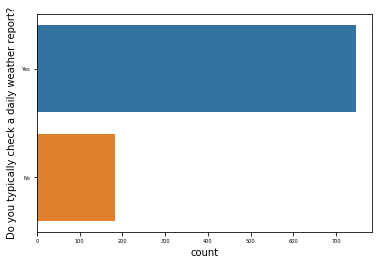

In [323]:
# analysing if people Do you typically check a daily weather report or not
# by the graph below it is clearly seen that more than 600 people do check daily weather report.

sns.countplot(y=df['Do you typically check a daily weather report?'],data=df)

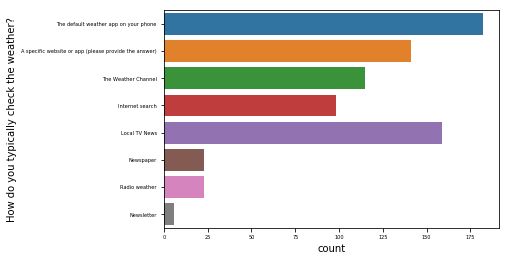

In [324]:
# Most often people check the daily weather report on Local TV news or an app 
sns.countplot(y=df2['How do you typically check the weather?'],data=df)

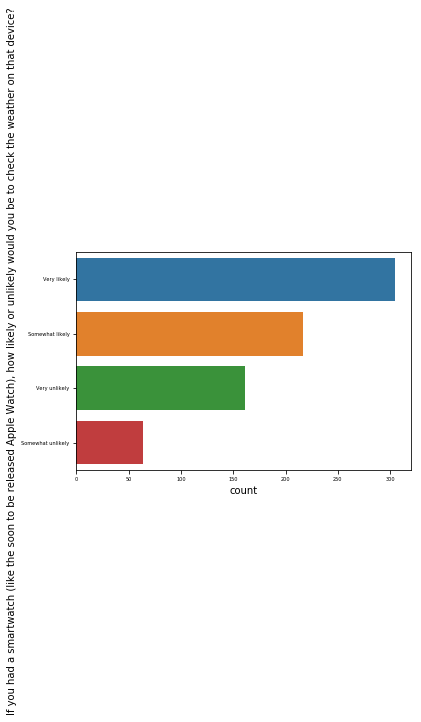

In [325]:
# As we analysed in the graph above most people check the weather on an application which indicates people are likely to have or get a smartwatch.

sns.countplot(y=df2['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'],data=df)

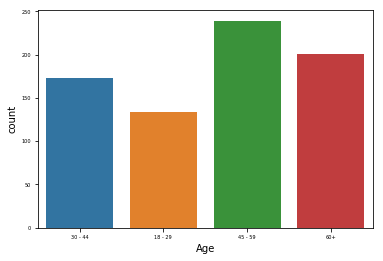

In [326]:
# following graph indicates the count of the age group fo which we have the data 

sns.countplot(x=df2['Age'],data=df)

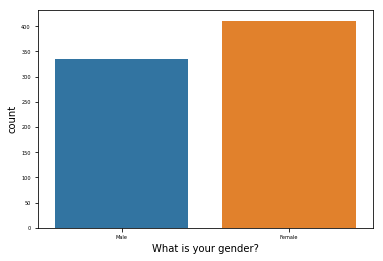

In [327]:
sns.countplot(x=df2['What is your gender?'],data=df)

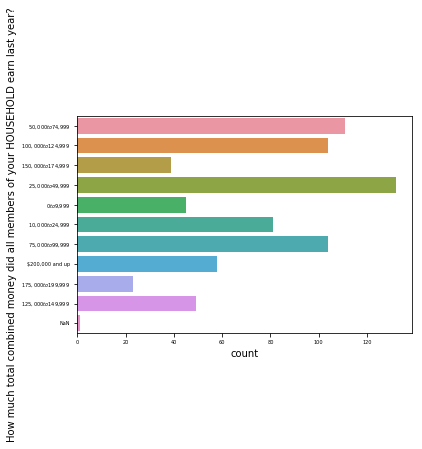

In [328]:
# Following graph reflects the count of the people with their household income
sns.countplot(y=df2["How much total combined money did all members of your HOUSEHOLD earn last year?"],data=df)

Text(8.54999999999999, 0.5, 'how likely or unlikely would you be to check the weather on that device(smartwatch)?')

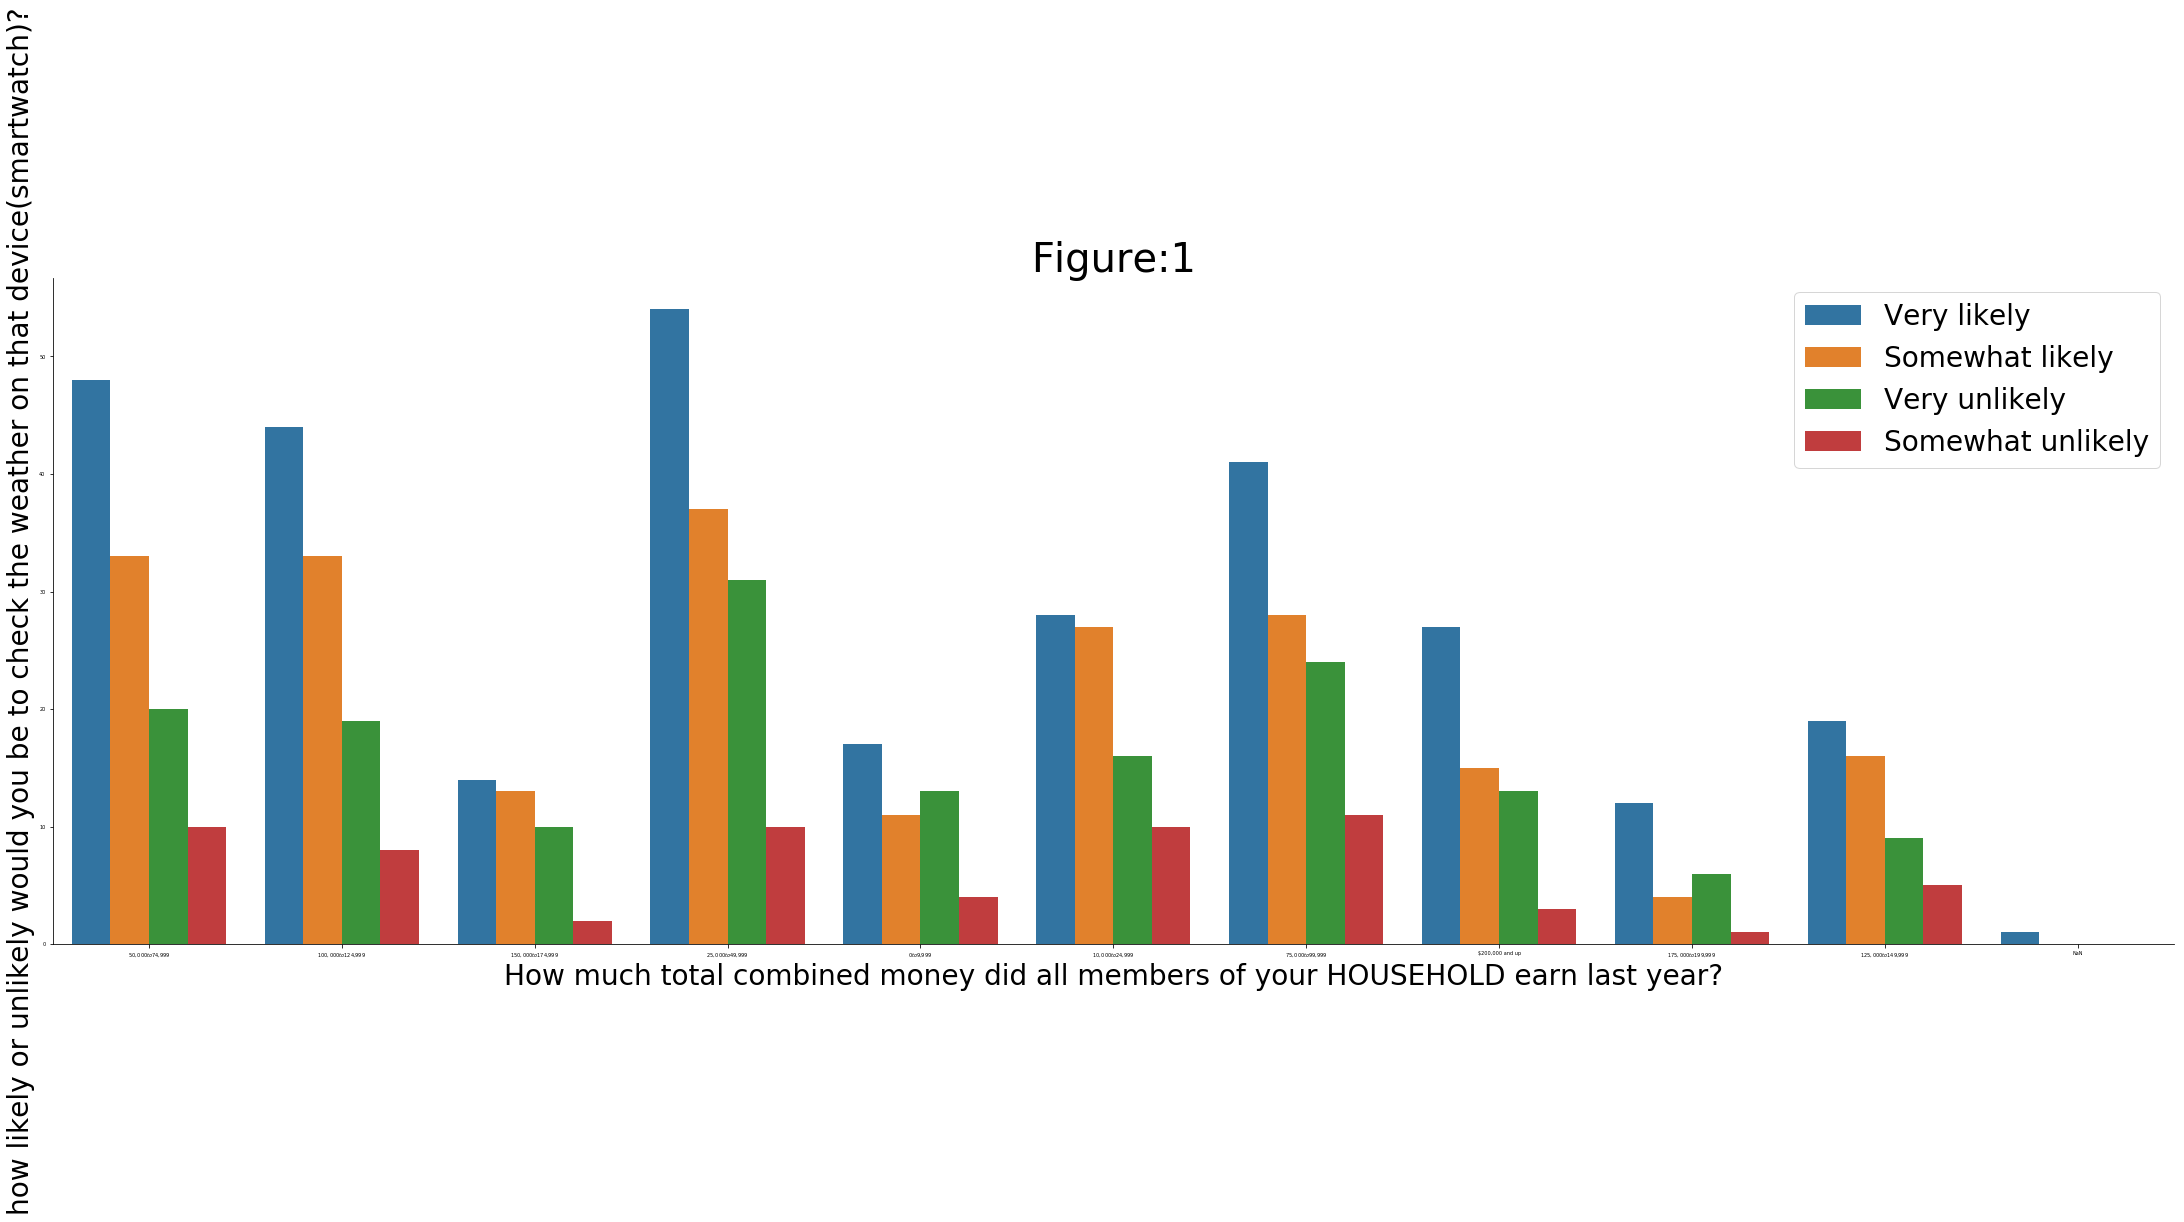

In [329]:
# This illustrates the graph of household income of the members with the how likely or unlikely would they check the weather on the device if they have a smartwatch.
sns.catplot(legend=False,x="How much total combined money did all members of your HOUSEHOLD earn last year?",hue="If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",kind="count",data=df2,height=6,size=10,aspect=3)
plt.title('Figure:1', fontsize=40)

plt.legend(fontsize='x-large', title_fontsize='30',loc=1, prop={'size': 28})

plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)

# Set x-axis label
plt.xlabel('How much total combined money did all members of your HOUSEHOLD earn last year?', fontsize=28)
# Set y-axis label
plt.ylabel('how likely or unlikely would you be to check the weather on that device(smartwatch)?', fontsize=28)

Text(13.175000000000011, 0.5, 'How much total combined money did all members of your HOUSEHOLD earn last year?')

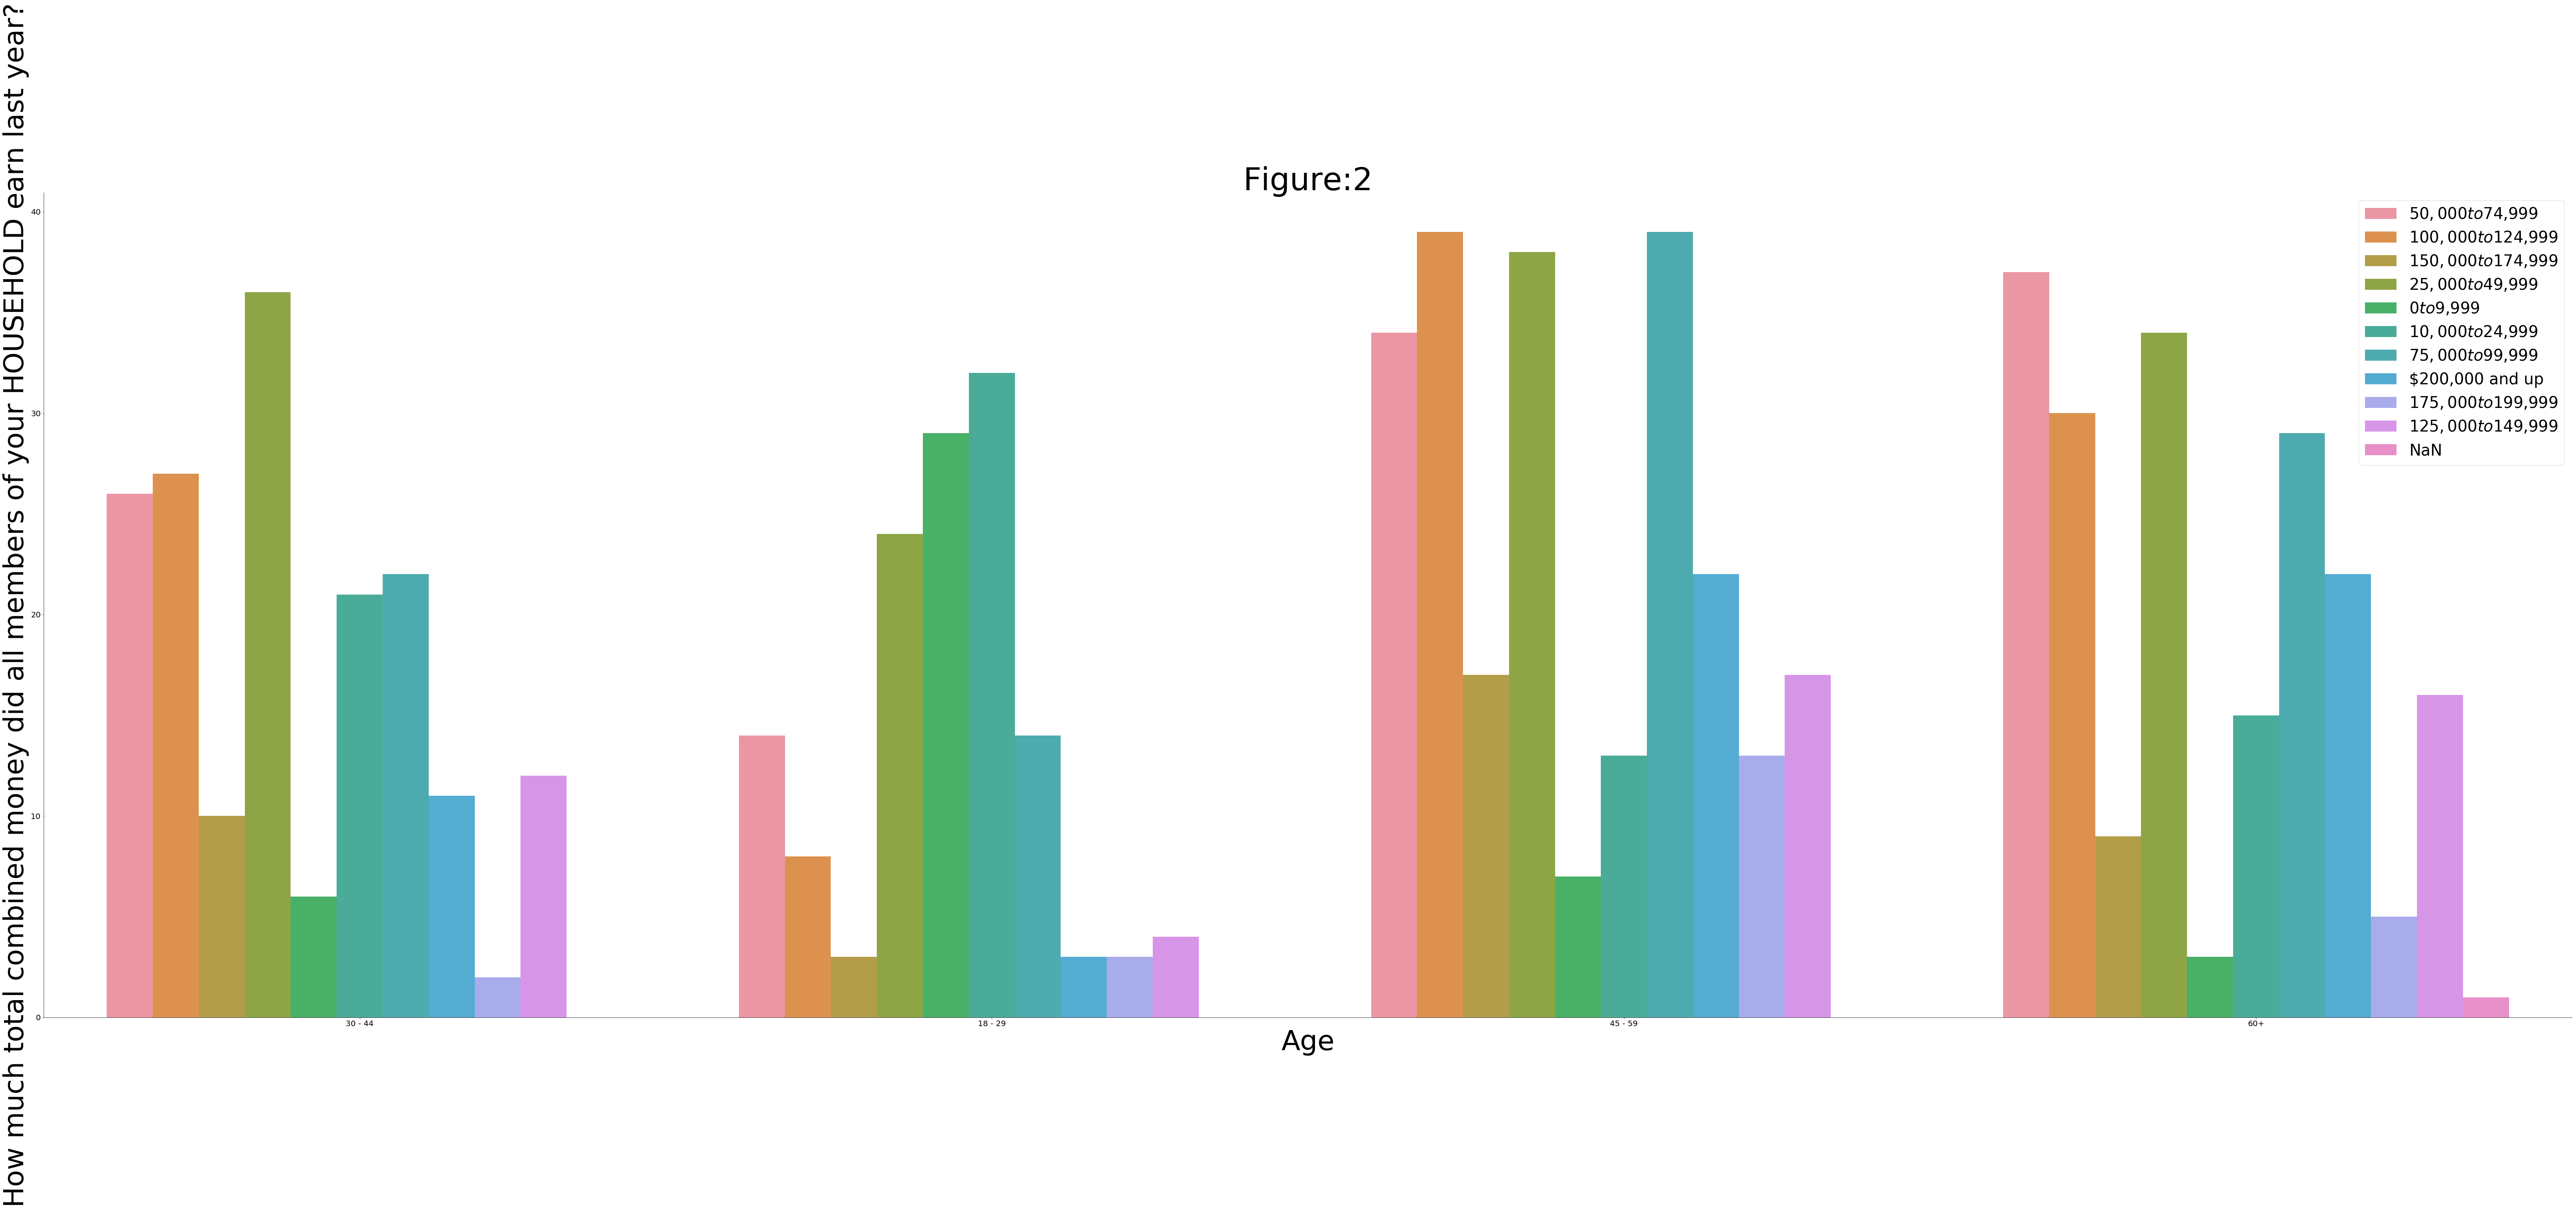

In [330]:
# this graph shows the age bucket with member's last years annual household income
sns.catplot(legend=False,x="Age",hue="How much total combined money did all members of your HOUSEHOLD earn last year?",kind="count",data=df2,height=15,size=30,aspect=3)
plt.title('Figure:2', fontsize=80)
plt.legend(fontsize='x-large', title_fontsize='20',loc=1, prop={'size': 40})

plt.rc('xtick', labelsize=200)    # fontsize of the tick labels
plt.rc('ytick', labelsize=200)

# Set x-axis label
plt.xlabel('Age', fontsize=70)
# Set y-axis label
plt.ylabel('How much total combined money did all members of your HOUSEHOLD earn last year?', fontsize=70)

Text(-95.63750000000002, 0.5, 'How much total combined money did all members of your HOUSEHOLD earn last year?')

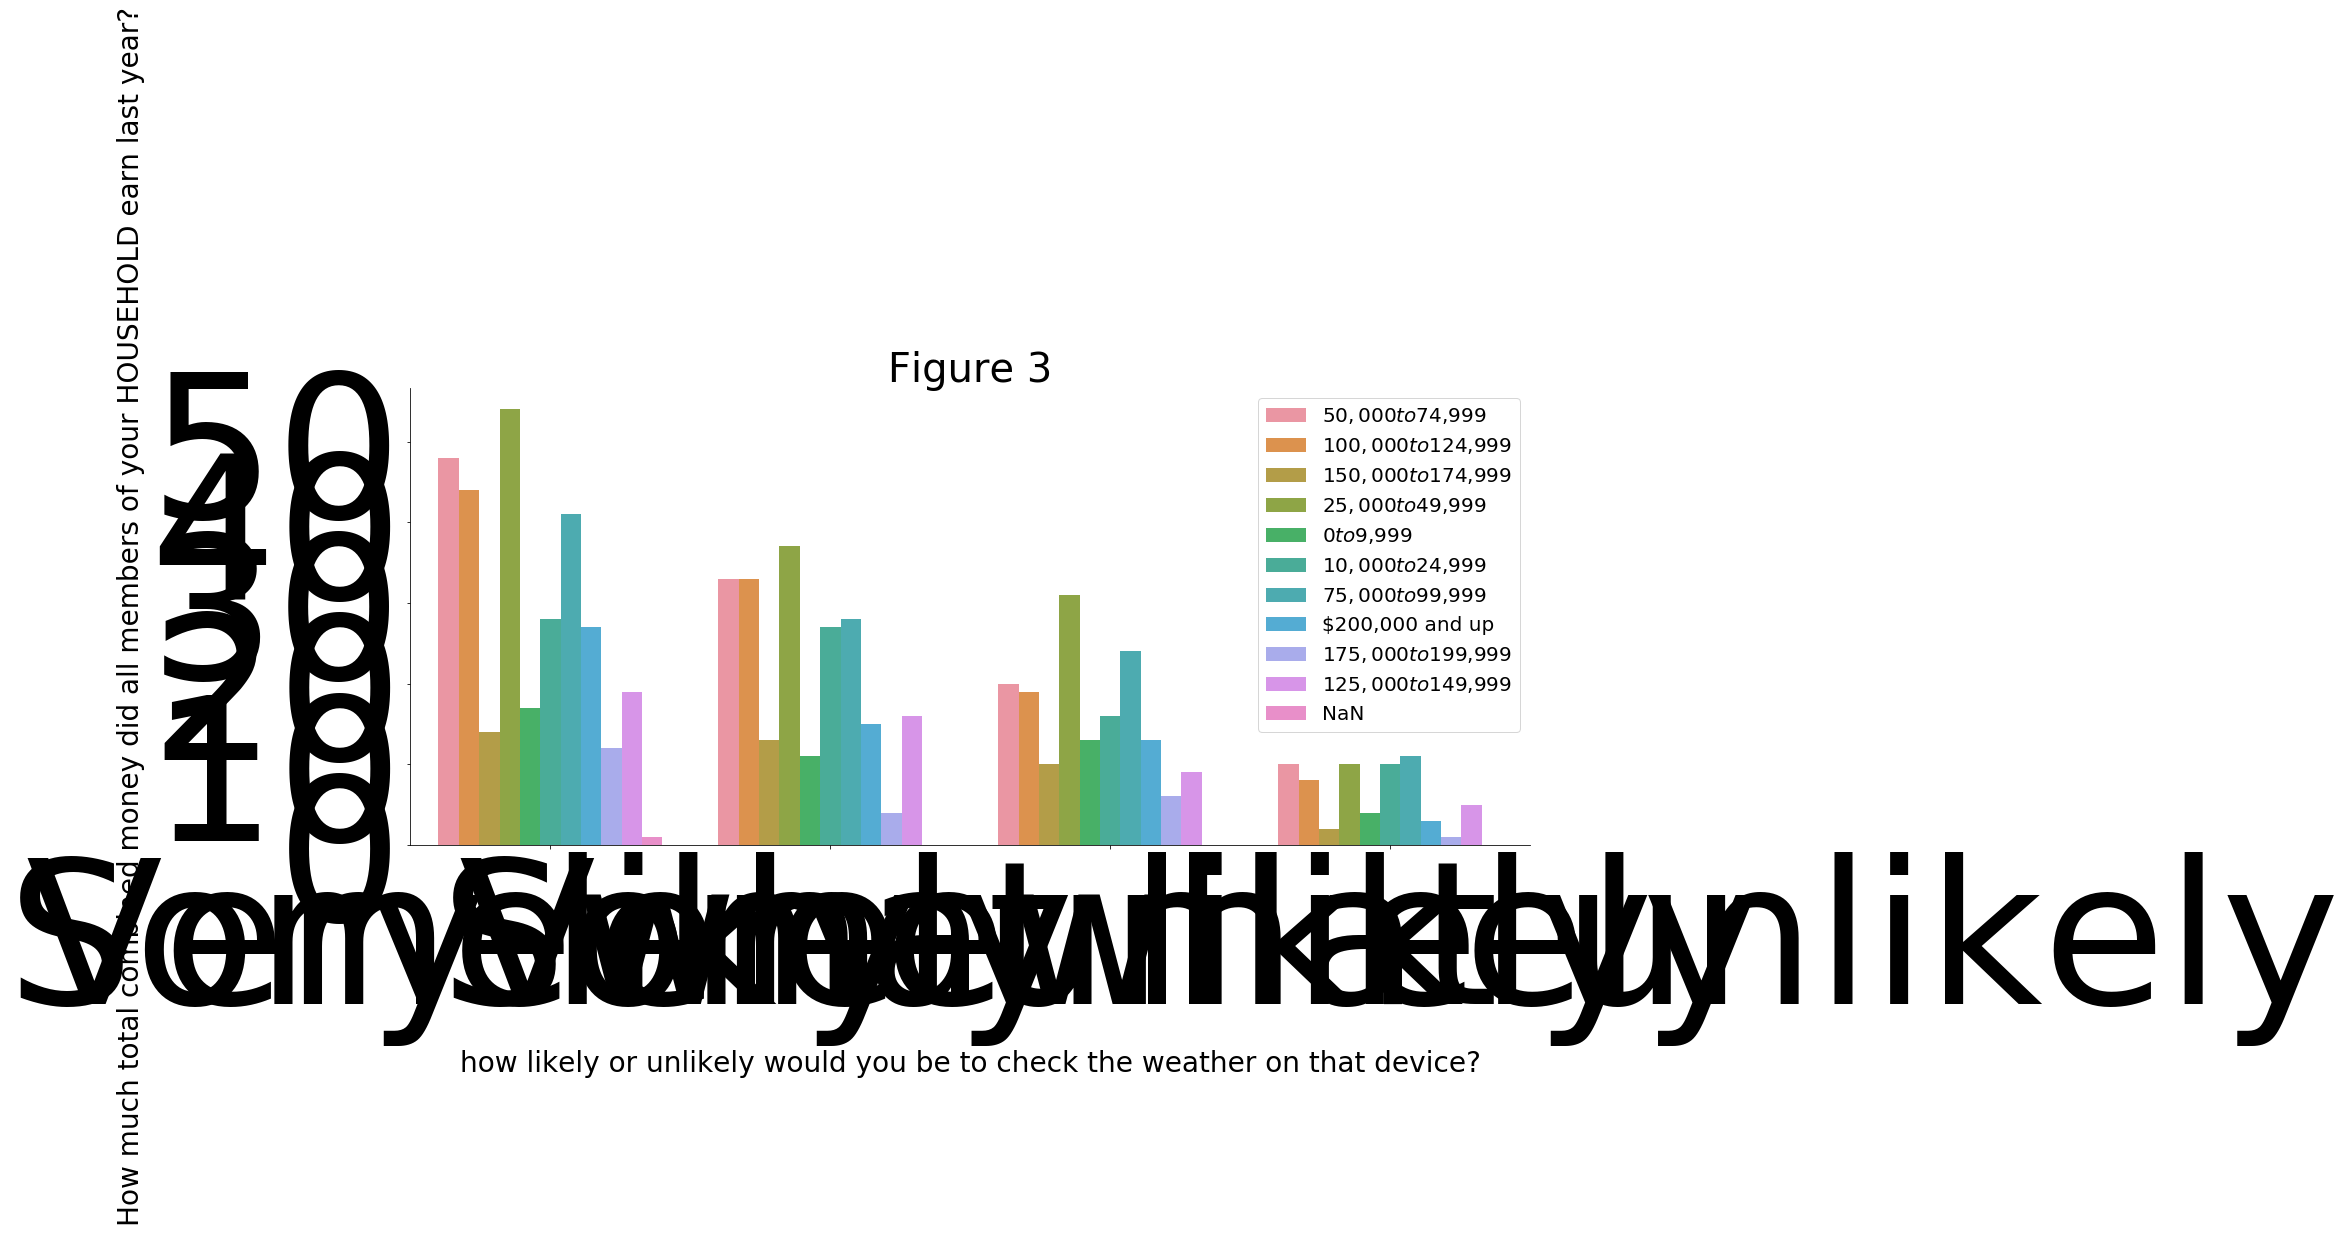

In [331]:
# Figure 3 shows the graph of how likely people would check the weather on the smartwatch if they have any with respect to member's last years annual income
sns.catplot(legend=False,x="If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",hue="How much total combined money did all members of your HOUSEHOLD earn last year?",kind="count",data=df2,height=6,size=10,aspect=3)
plt.title('Figure 3', fontsize=40)
plt.legend(fontsize='x-large', title_fontsize='18',loc=1, prop={'size': 20})

plt.rc('xtick', labelsize=5)    # fontsize of the tick labels
plt.rc('ytick', labelsize=5)

# Set x-axis label
plt.xlabel('how likely or unlikely would you be to check the weather on that device?', fontsize=28)
# Set y-axis label
plt.ylabel('How much total combined money did all members of your HOUSEHOLD earn last year?', fontsize=28)

Text(5.29999999999999, 0.5, 'Do you typically check a daily weather report?')

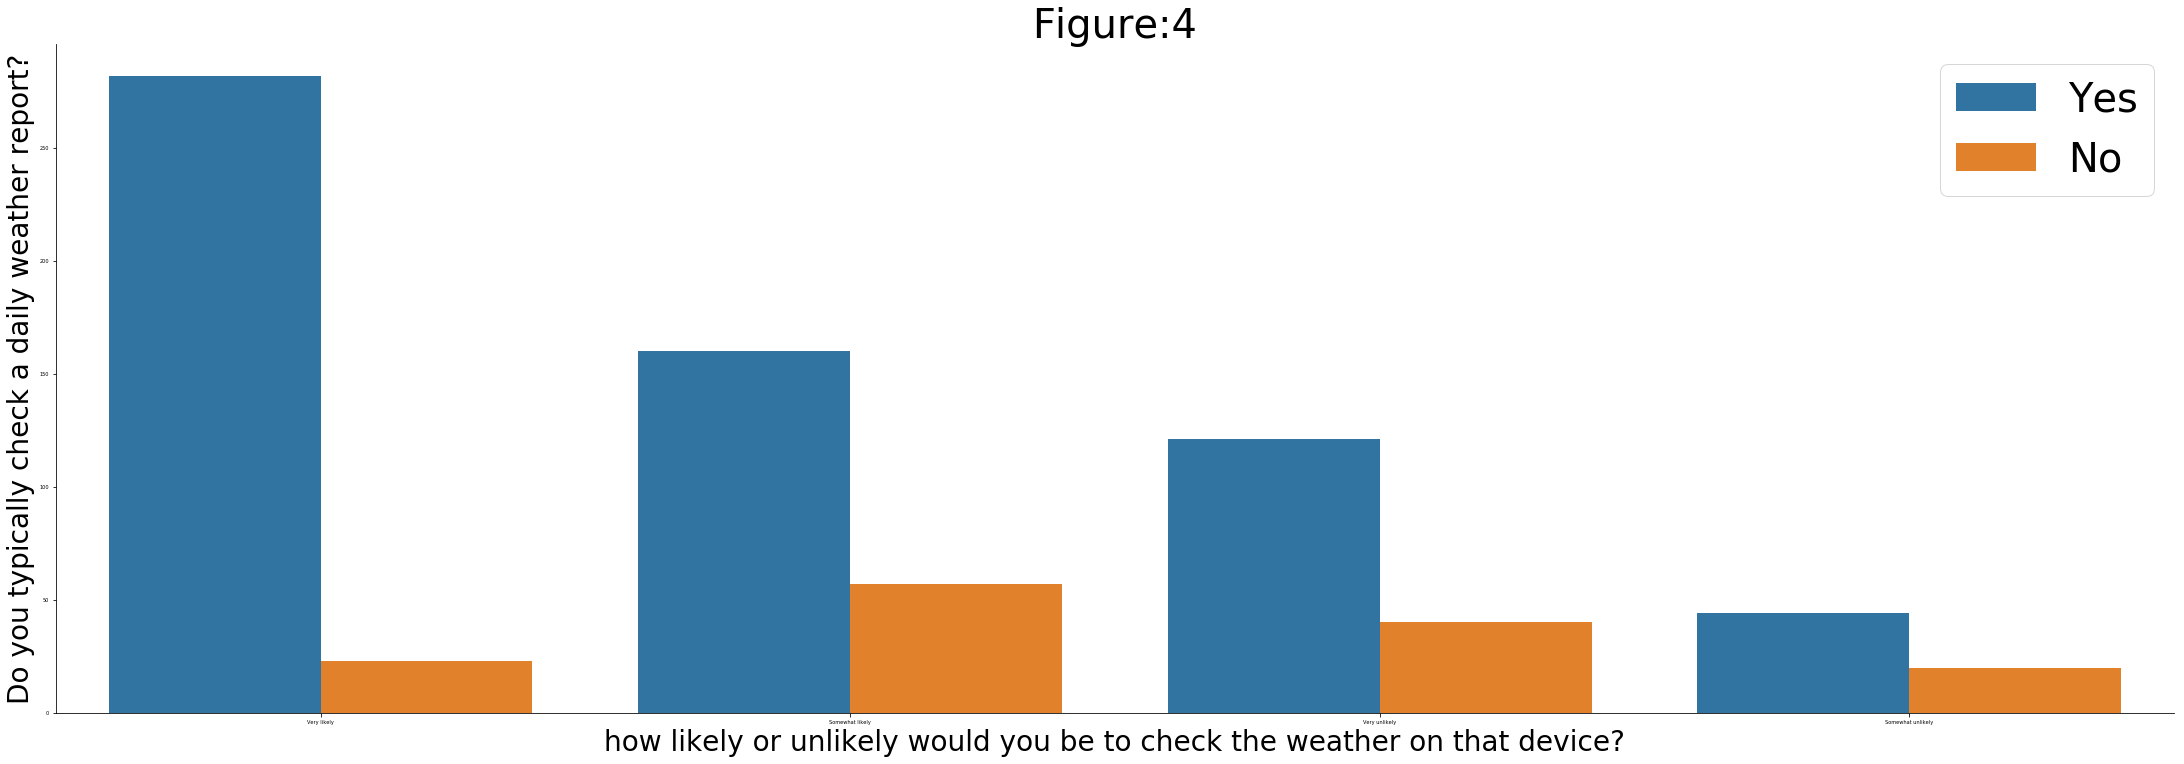

In [332]:
# analysing if people check daily report with respect to If they had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?

sns.catplot(legend=False,x="If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",hue="Do you typically check a daily weather report?",kind="count",data=df2,height=6,size=10,aspect=3)
plt.title('Figure:4',fontsize=40)
plt.legend(fontsize='x-large', title_fontsize='18',loc=1, prop={'size': 40})

plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)

# Set x-axis label
plt.xlabel('how likely or unlikely would you be to check the weather on that device?', fontsize=28)
# Set y-axis label
plt.ylabel('Do you typically check a daily weather report?', fontsize=28)

In [333]:
# making the copy of the table for the people who do not check the daily report

df3= df2 = df2[df2['Do you typically check a daily weather report?'] != 'Yes']

Text(-5.950000000000017, 0.5, 'how likely or unlikely would you be to check the weather on that device?')

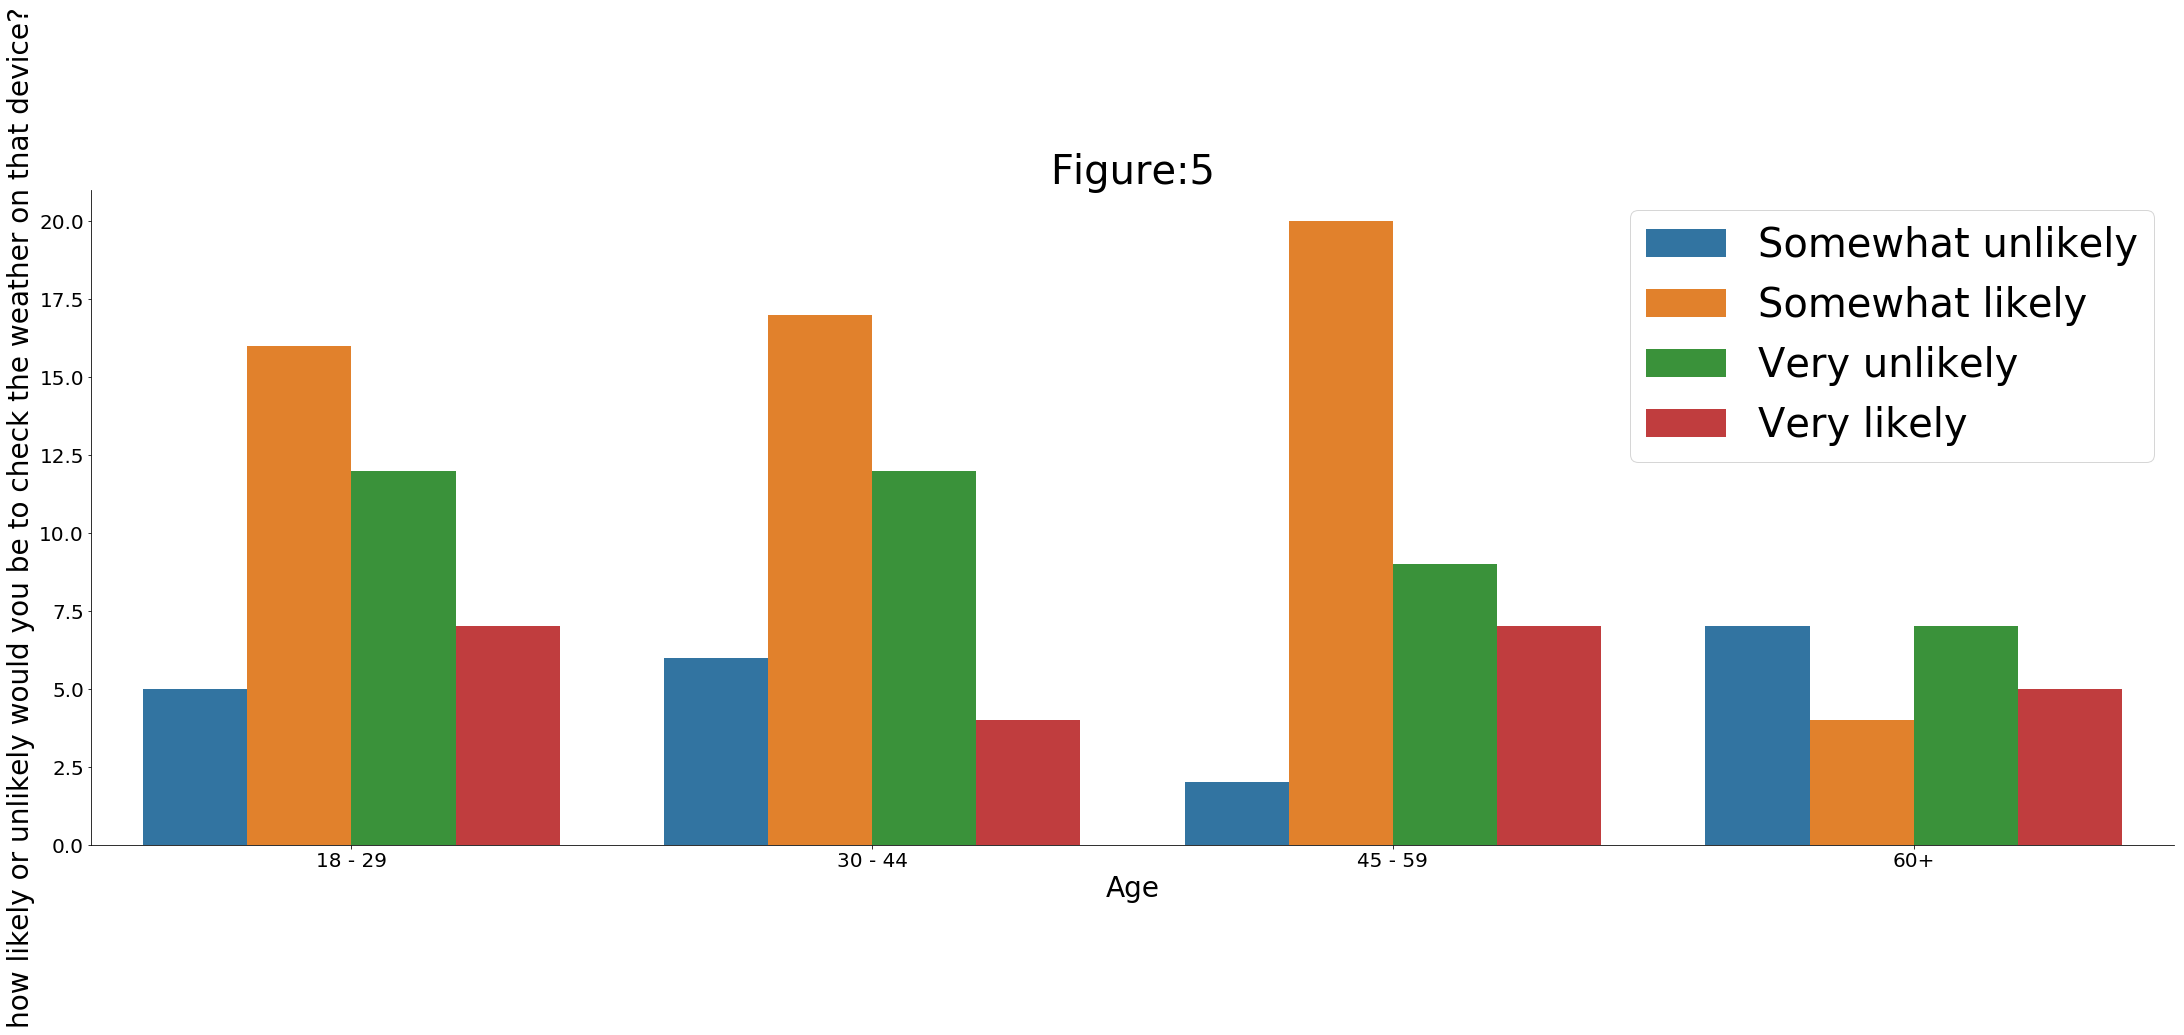

In [334]:
# with the people who dont check the daily report finding how many of those are likely to check report on smartwatch if they have one 
sns.catplot(legend=False,x="Age",hue="If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",kind="count",data=df3,height=6,size=10,aspect=3)
plt.title('Figure:5',fontsize=40)
plt.legend(fontsize='x-large', title_fontsize='18',loc=1, prop={'size': 40})

plt.rc('xtick', labelsize=5)    # fontsize of the tick labels
plt.rc('ytick', labelsize=5)

# Set x-axis label
plt.xlabel('Age', fontsize=28)
# Set y-axis label
plt.ylabel('how likely or unlikely would you be to check the weather on that device?', fontsize=28)